In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.weights = np.random.uniform(-0.5, 0.5, 3)  # Adiciona +1 para o termo de polarização
        self.learning_rate = learning_rate

    def predict(self, x):
        activation = np.dot(self.weights[1:], x) + self.weights[0]  # Adiciona o termo de polarização
        return 1 if activation >= 0 else 0

    def train(self, X, y):
        epochs = 0
        total_adjustments = 0
        errors = True

        while errors:
            errors = False
            epoch_adjustments = 0

            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction

                if error != 0:
                    self.weights[1:] += self.learning_rate * error * X[i]
                    self.weights[0] += self.learning_rate * error  # Atualiza o termo de polarização
                    epoch_adjustments += 1
                    errors = True

            epochs += 1
            total_adjustments += epoch_adjustments

            print(f"Epoch {epochs}: Adjustments = {epoch_adjustments}")

        print(f"Total Adjustments: {total_adjustments}")
        print(f"Epochs until convergence: {epochs}")

        return total_adjustments, epochs

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(8, 6))

        for i in range(len(X)):
            if y[i] == 0:
                plt.scatter(X[i][0], X[i][1], color='red', marker='o')  # Ajuste aqui
            else:
                plt.scatter(X[i][0], X[i][1], color='blue', marker='o')  # Ajuste aqui

        slope = -self.weights[1] / self.weights[2]  
        intercept = -self.weights[0] / self.weights[2]
        x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)  # Usar a primeira característica para os limites
        y_vals = slope * x_vals + intercept
        plt.plot(x_vals, y_vals, color='black')

        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title('Perceptron Decision Boundary')
        plt.show()


In [3]:
# Carregar os dados binários do arquivo
def load_data(filename):
    with open(filename, 'rb') as file:
        data = np.fromfile(file, dtype=np.float64)
        # Reshape data into (m, 3) where m is the number of examples
        data = data.reshape(-1, 3)
    return data

# Converter os rótulos para inteiros
def convert_labels(labels):
    return labels.astype(int)

Epoch 1: Adjustments = 12
Epoch 2: Adjustments = 0
Total Adjustments: 12
Epochs until convergence: 2


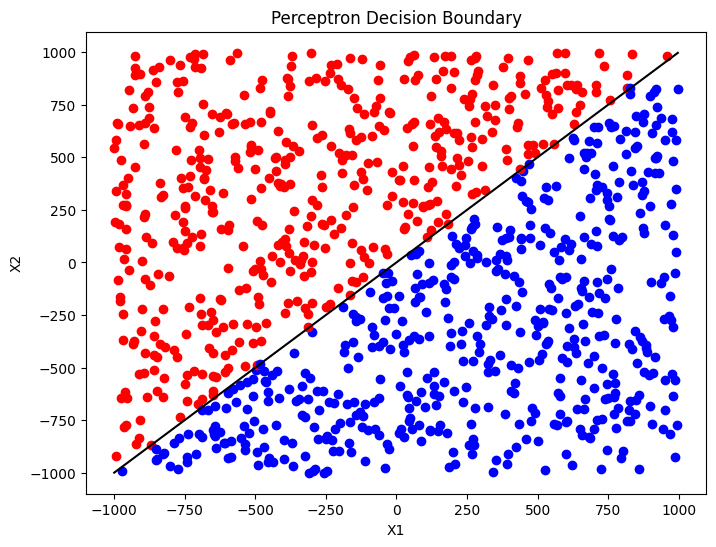

In [7]:
data = load_data('datasets/dataAll.txt')
X = data[:, :-1]  # Features
y = convert_labels(data[:, -1])  # Labels

# Inicializar e treinar o perceptron
perceptron = Perceptron(learning_rate=0.1)
total_adjustments, epochs = perceptron.train(X, y)

# Plotar o limite de decisão
perceptron.plot_decision_boundary(X, y)
